<a href="https://colab.research.google.com/github/Andres8bit/Machine-Learning/blob/main/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Linear Regression on Boston Housing Data</h2>

In [ ]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

<h4>Use scikit-learn library in the following cell</h4>

In [ ]:
data, target = datasets.load_boston(True)
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

# Task 1-1: use linear regression in sklearn
model = linear_model.LinearRegression().fit(train_data,train_target)
model.score(train_data,train_target)

0.7508856358979672

In [ ]:
# Task 1-2: show intercept and coefficents
model.coef_


array([[-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,
         2.78443820e+00, -1.72026334e+01,  4.43883520e+00,
        -6.29636221e-03, -1.44786537e+00,  2.62429736e-01,
        -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]])

In [ ]:
model.intercept_

array([30.24675099])

In [ ]:

# Task 1-3: show errors on training dataset and testing dataset
test = model.predict(test_data)# need to reduce back down to an array
train = model.predict(train_data)
test_error = mean_squared_error(test, test_target)
train_error = mean_squared_error(train,train_target)
print("testing error" ,test_error)
print("training error" ,train_error)

testing error 24.291119474973616
training error 21.641412753226323


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [ ]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    #x_t = np.transpose(X)
    #x_xt = np.dot(x_t,X)
    #x_xt_i = inv(x_xt)
    #prod = np.dot(x_xt_i,x_t)
    # return np.dot(prod,y)
    return inv(X.T.dot(X)).dot(X.T).dot(y) #single step analytical solution same as commented out code, but in one line
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.dot(X,w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
print("coefficents",w) #coefficients

coefficents [[ 3.02467510e+01]
 [-1.13055924e-01]
 [ 3.01104641e-02]
 [ 4.03807204e-02]
 [ 2.78443820e+00]
 [-1.72026334e+01]
 [ 4.43883520e+00]
 [-6.29636221e-03]
 [-1.44786537e+00]
 [ 2.62429736e-01]
 [-1.06467863e-02]
 [-9.15456240e-01]
 [ 1.23513347e-02]
 [-5.08571424e-01]]


In [ ]:
# Task 2-4: show errors on training dataset and testing dataset
training = myPredictFun(train_data_intercept,w)
predictions = myPredictFun(test_data_intercept,w)


print("Training:",mean_squared_error(training, train_target))
print("Testing:" ,mean_squared_error(predictions, test_target))

Training: 21.641412753226312
Testing: 24.29111947497721


<h4>Use numerical solution (baisc gradient descent) to perform linear regression in the following cell</h4>

coefficents: [[-1.00085732]
 [ 0.69325493]
 [ 0.2722988 ]
 [ 0.71963833]
 [-2.02168711]
 [ 3.14663523]
 [-0.17656713]
 [-3.08117226]
 [ 2.23405072]
 [-1.74764162]
 [-2.03723401]
 [ 1.12946358]
 [-3.61081033]]
intercept: [22.79653465]
training error: 21.64145885498323
testing error: 24.301087745476092


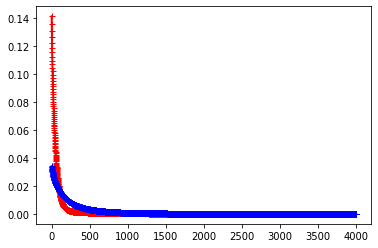

In [ ]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations. 
def myGradientDescentFun(X,y,learning_rate,numItrs):
    theta = np.random.randn(14,1) #Random init
    loss_hist = []
    for itr in range(numItrs):
        gradients = 2/numItrs * X.T.dot(X.dot(theta) - y)
        loss_hist.append(mean_squared_error(theta, theta - learning_rate*gradients))
        theta = theta - learning_rate*gradients
    return theta,loss_hist 

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.dot(X,w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, train_loss = myGradientDescentFun(train_data_intercept,train_target,0.1,4000)

# Task 3-3: show intercept and coefficents
print("coefficents:", w[1:])
print("intercept:",w[0])

# Task 3-4: show errors on training dataset and testing dataset
train_predict = myPredictFun(train_data_intercept,w)
test_predict = myPredictFun(test_data_intercept,w)

train_error = mean_squared_error(train_target,train_predict)
test_error = mean_squared_error(test_target,test_predict)

print("training error:",train_error)
print("testing error:",test_error)

# Task 3-5: plot learning curves showing training errors and testing errors along iterations
_,test_loss = myGradientDescentFun(test_data_intercept,test_target,0.1,4000)
plt.plot(np.sqrt(train_loss),"r-+",linewidth=2,label="train")
plt.plot(np.sqrt(test_loss),"b-+",linewidth=2,label="test")

<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

coefficents: [[-0.9734586 ]
 [ 0.58938027]
 [-0.20973066]
 [ 0.62573677]
 [-2.13691936]
 [ 3.60405694]
 [-0.49827027]
 [-2.83721989]
 [ 1.52833167]
 [-1.11767031]
 [-2.0639778 ]
 [ 0.94101102]
 [-3.3832568 ]]
intercept: [22.81570745]
training error: 22.680627104126046
testing error: 25.94245796102764


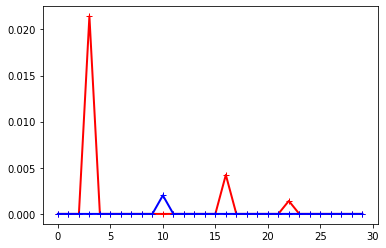

In [ ]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize):
    theta = np.random.randn(14,1) # randomly init. 
    loss_hist = []
    for epoch in range(epoches):
      #gradient = 0
      for i in range(batchsize):
        random_index = np.random.randint(batchsize)
        xi = X[random_index:random_index+1] #selecting random training data
        yi = y[random_index:random_index+1]
        gradient = 2*xi.T.dot(xi.dot(theta) - yi)
        theta = theta -(learning_rate/(batchsize/epoches))*gradient #dividing learning rate by batches per epoches
      loss_hist.append(mean_squared_error(theta, theta -(learning_rate/(batchsize/epoches))*gradient))
    return theta,loss_hist

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.dot(X,w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, train_loss = myGradientDescentFun(train_data_intercept,train_target,.1,30,4000)


# Task 4-3: show intercept and coefficents
print("coefficents:",w[1:])
print("intercept:",w[0])
# Task 4-4: show errors on training dataset and testing dataset
train_predict = myPredictFun(train_data_intercept,w)
test_predict = myPredictFun(test_data_intercept,w)

train_error = mean_squared_error(train_target,train_predict)
test_error = mean_squared_error(test_target,test_predict)

print("training error:",train_error)
print("testing error:",test_error)

# Task 4-5: plot learning curves showing training errors and testing errors along batch
_,test_loss = myGradientDescentFun(test_data_intercept,test_target,0.1,30,4000)
plt.plot(np.sqrt(train_loss),"r-+",linewidth=2,label="train")
plt.plot(np.sqrt(test_loss),"b-+",linewidth=2,label="test")
